# Replicator Simulation

Ver página 6 ecuación 17 Wang et al (2009)

The following function calculates $$\binom{N}{m}$$

In [0]:
from math import factorial
import pandas as pd
from time import time
import matplotlib.pyplot as plt

def combinatoria(N, m):    
    if N == m:        
        return 1
    return factorial(N)/(factorial(m)*factorial(N-m))

The following function calculates $$\sum_{j=inf}^{sup}\binom{N}{j}x^j(1-x)^{N-j}$$

In [0]:
def sumatoria(inf, sup, x, N):
    aux = 0
    j = inf
    while j <= sup:
        aux += combinatoria(N, j)*(x**(j))*((1-x)**(N-j))
        j += 1
    return aux      

In the following expression: $$m=\left [ \frac{T}{H} \right ]$$ And it calculates:

$$\begin{cases}\
 & \ x(1-x)\left[-H + pW\binom{N-1}{m-1}x^{m-1}(1-x)^{N-m} + Hp\sum_{j=0}^{m-2}\binom{N-1}{j}x^j(1-x)^{N-1-j}\right],\, if\,\left [ \frac{T}{H} \right ]=\frac{T}{H}\\ 
 &  \ x(1-x)\left[-H + pW\binom{N-1}{m}x^{m}(1-x)^{N-m-1} + Hp\sum_{j=0}^{m-1}\binom{N-1}{j}x^j(1-x)^{N-1-j}\right],\, if\,  \left [ \frac{T}{H} \right ]\neq\frac{T}{H}\\  
\end{cases}$$

In [0]:
def replicator(H, p, W, N, T, x):
    if x == 0 or x == 1:
        return 0
    m = int(T/H)
    if T%H == 0:        
        return x*(1-x)*(-H + p*W*combinatoria(N-1, m-1)*(x**(m-1))*((1-x)**(N-m)) + H*p*sumatoria(0,m-2,x,N-1))
    else:
        return x*(1-x)*(-H + p*W*combinatoria(N-1, m)*(x**(m))*((1-x)**(N-m-1)) + H*p*sumatoria(0,m-1,x,N-1))
    

La siguiente función itera con distintos "x" buscando un cambio de signo en el "replicator".
En cada iteración evalúa el replicator, si este es **positivo**, hace **aumentar** "x" marginalmente, si es **negativo** lo hace **disminuir** marginalmente.
Recibe como parámetro la composición de partida y los decimales de la variación marginal.

The following function calculates the jacobian of the replicator equation

In [0]:
def jacobiano(H, p, W, N, T, x):
    from sympy import symbols, diff, binomial, Sum
    x_ev = x
    m = int(T/H)
    x, i = symbols('x i')  
    if T%H == 0:        
        expr = x*(1-x)*(- H + p*W*binomial(N-1,m-1)*(x**(m-1))*((1-x)**(N-m))+ H*p*Sum(binomial(N-1,i)*x**i*(1-x)**(N-i),(i,0,m-2))) 
    else:
        expr = x*(1-x)*(- H + p*W*binomial(N-1,m)*(x**(m))*((1-x)**(N-m-1))+ H*p*Sum(binomial(N-1,i)*x**i*(1-x)**(N-1-i),(i,0,m-1)))
    expr_diff = diff(expr, x)    
    return float(expr_diff.subs(x,x_ev).evalf())

In [0]:
def buscar_equilibrio(H, p, W, N, T, x0, decimales):
    
    x = [x0,x0]
    gen = 1
    salto = 10**(-decimales)
    rep_gen_before = replicator(H, p, W, N, T, x[gen-1])
    rep_gen_current = replicator(H, p, W, N, T, x[gen])
      
    while rep_gen_before*rep_gen_current >= 0:
        if rep_gen_current > 0:
            x.append(round(x[gen]+salto,decimales))
        elif rep_gen_current == 0:            
            if jacobiano(H, p, W, N, T, x[gen]) > 0:
                x.append(round(x[gen]-salto,decimales))
            else:
                return x[gen]            
        else:
            x.append(round(x[gen]-salto,decimales))
        gen += 1
        rep_gen_before = rep_gen_current
        rep_gen_current = replicator(H, p, W, N, T, x[gen])
    
    return round((x[-1]+x[-2])/2,decimales+1)

La siguiente función itera con distintos "x" buscando un cambio de signo en el "replicator". En cada iteración evalúa el replicator, si este es **positivo**, hace **disminuir** "x" marginalmente, si es **negativo** lo hace **aumentar** marginalmente. Recibe como parámetro la composición de partida y los decimales de la variación marginal.

In [0]:
def buscar_min_x_inicial(H, p, W, N, T, x0, decimales):
    m = int(T/H) - 1*(T%H == 0)
    #if m > N:
    #  return 0    
    x = [x0,x0]
    gen = 1
    salto = 10**(-decimales)
    rep_gen_before = replicator(H, p, W, N, T, x[gen-1])
    rep_gen_current = replicator(H, p, W, N, T, x[gen])
        
    while rep_gen_before*rep_gen_current >= 0:
        if rep_gen_current > 0:
            x.append(round(x[gen]-salto,3))
        elif rep_gen_current == 0: 
            # en este caso estoy apostando porque no de con la raiz exacta
            return x[gen]
        else:
            x.append(round(x[gen]+salto,3))
        gen += 1
        rep_gen_before = rep_gen_current
        rep_gen_current = replicator(H, p, W, N, T, x[gen])
    
    return round((x[-1]+x[-2])/2,decimales+1)

In [0]:
def posicion_cambio(array):
    for i in range(len(array)-1):
        if array[i] != array[i+1]:
            return i
    return -1

A continuacion se prueba la instancia descrita en la Figura 3 de Wang (2009). Se estudia el efecto de "p", asi que se registran los resultados para distintos valores de este parametro con un x inicial de 0.8

Demora total: 1.4405183792114258


,p,Equilibrium_x,Minimum_inicial_x
0,0.00,0.0000,1.0000
1,0.01,0.0000,1.0000
2,0.02,0.0000,1.0000
3,0.03,0.0000,1.0000
4,0.04,0.0000,1.0000
...,...,...,...
96,0.96,0.7755,0.2985
97,0.97,0.7775,0.2775
98,0.98,0.7805,0.2505
99,0.99,0.7825,0.2135


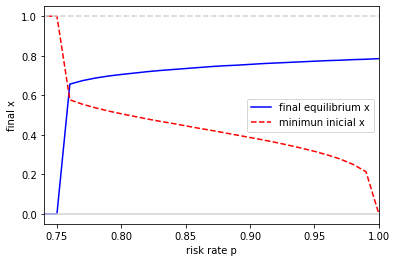

In [12]:
W = 20
H = 7
p = 0.8
T = 40
N = 8 
x0 = 0.8
X_eq = []
X_min = []
P = [i/100 for i in range(0,101,1)]
inicio = time()

for p in P:
    xeq = buscar_equilibrio(H, p, W, N, T, x0, 3)
    xmin = buscar_min_x_inicial(H, p, W, N, T, 1- x0, 3)
    X_eq.append(xeq)
    X_min.append(xmin)
    #print(p,"\t", xeq, "\t", xmin)

print("Demora total: {}".format(time()-inicio))
plt.plot(P, X_eq, label = "final equilibrium x", color ="blue")
plt.plot(P, X_min, label = "minimun inicial x", ls = '--', color="red")
plt.axhline(y=1,ls="--", color = "lightgrey")
plt.axhline(y=0,ls="-", color = "lightgrey")
plt.legend()
plt.xlim(P[posicion_cambio(X_eq)-1],P[-1]) 
plt.ylabel("final x")
plt.xlabel("risk rate p")

pd.DataFrame({"p":P, "Equilibrium_x":X_eq, "Minimum_inicial_x":X_min})
#analizar los casos que el replicator da 0,  

A continuacion se prueba la instancia descrita en la Figura 3 de Wang (2009). Se estudia el efecto de "p", asi que se registran los resultados para distintos valores de este parametro con un x inicial de 1.0

Demora total: 1.8981385231018066


,p,Equilibrium_x,Minimum_inicial_x
0,0.00,0.0000,0.0
1,0.01,0.0000,0.0
2,0.02,0.0000,0.0
3,0.03,0.0000,0.0
4,0.04,0.0000,0.0
...,...,...,...
96,0.96,0.7755,0.0
97,0.97,0.7775,0.0
98,0.98,0.7805,0.0
99,0.99,0.7825,0.0


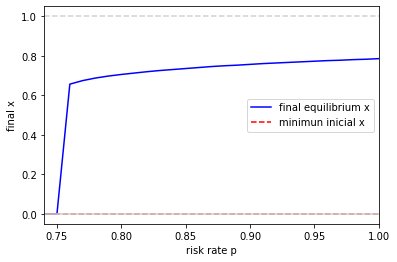

In [9]:
W = 20
H = 7
p = 0.8
T = 40
N = 8 
x0 = 1.0
X_eq = []
X_min = []
P = [i/100 for i in range(0,101,1)]
inicio = time()

for p in P:
    xeq = buscar_equilibrio(H, p, W, N, T, x0, 3)
    xmin = buscar_min_x_inicial(H, p, W, N, T, 1- x0, 3)
    X_eq.append(xeq)
    X_min.append(xmin)
    #print(p,"\t", xeq, "\t", xmin)

print("Demora total: {}".format(time()-inicio))
plt.plot(P, X_eq, label = "final equilibrium x", color ="blue")
plt.plot(P, X_min, label = "minimun inicial x", ls = '--', color="red")
plt.axhline(y=1,ls="--", color = "lightgrey")
plt.axhline(y=0,ls="-", color = "lightgrey")
plt.legend()
plt.xlim(P[posicion_cambio(X_eq)-1],P[-1]) 
plt.ylabel("final x")
plt.xlabel("risk rate p")

pd.DataFrame({"p":P, "Equilibrium_x":X_eq, "Minimum_inicial_x":X_min})

Demora total: 0.35576367378234863


,W,Equilibrium_x,Minimum_inicial_x
0,0,0.0000,1.0000
1,1,0.0000,1.0000
2,2,0.0000,1.0000
3,3,0.0000,1.0000
4,4,0.0000,1.0000
5,5,0.0000,1.0000
6,6,0.0000,1.0000
7,7,0.0000,1.0000
8,8,0.0000,1.0000
9,9,0.0000,1.0000


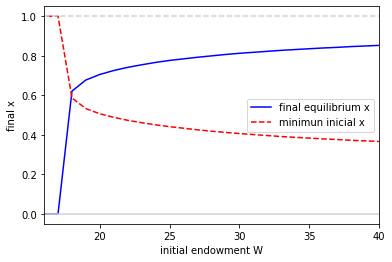

In [10]:
W = 20
H = 7
p = 0.8
T = 40
N = 8 
x0 = 0.9
X_eq = []
X_min = []
W = [i for i in range(0,41,1)]
inicio = time()

for w in W:
    xeq = buscar_equilibrio(H, p, w, N, T, x0, 3)
    xmin = buscar_min_x_inicial(H, p, w, N, T, 1- x0, 3)
    X_eq.append(xeq)
    X_min.append(xmin)
    #print(w,"\t", xeq, "\t", xmin)

print("Demora total: {}".format(time()-inicio))
plt.plot(W, X_eq, label = "final equilibrium x", color ="blue")
plt.plot(W, X_min, label = "minimun inicial x", ls = '--', color="red")
plt.axhline(y=1,ls="--", color = "lightgrey")
plt.axhline(y=0,ls="-", color = "lightgrey")
plt.legend()
plt.xlim(W[posicion_cambio(X_eq)-1],W[-1])  
plt.ylabel("final x")
plt.xlabel("initial endowment W")

pd.DataFrame({"W":W, "Equilibrium_x":X_eq, "Minimum_inicial_x":X_min})

Demora total: 0.23468470573425293


,T,Equilibrium_x,Minimum_inicial_x
0,7,0.1115,0.0000
1,8,0.2015,0.0235
2,9,0.2015,0.0235
3,10,0.2015,0.0235
4,11,0.2015,0.0235
5,12,0.2015,0.0235
6,13,0.2015,0.0235
7,14,0.2015,0.0235
8,15,0.2945,0.1175
9,16,0.2945,0.1175


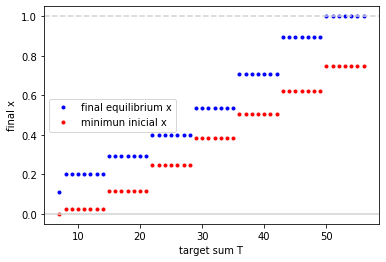

In [11]:
W = 20
H = 7
p = 0.8
T = 40
N = 8 
x0 = 0.9
X_eq = []
X_min = []
T = [i for i in range(H,N*H+1,1)] 
inicio = time() 

for t in T:
    xeq = buscar_equilibrio(H, p, W, N, t, x0, 3)
    xmin = buscar_min_x_inicial(H, p, W, N, t, 1- x0, 3)
    X_eq.append(xeq)
    X_min.append(xmin)
    #print(t,"\t", xeq, "\t", xmin)

print("Demora total: {}".format(time()-inicio))
plt.plot(T, X_eq, label = "final equilibrium x", color ="blue", ls="", marker=".")
plt.plot(T, X_min, label = "minimun inicial x", ls = '', color="red", marker = ".")
plt.axhline(y=1,ls="--", color = "lightgrey")
plt.axhline(y=0,ls="-", color = "lightgrey")
plt.legend()
plt.ylabel("final x")
plt.xlabel("target sum T")

pd.DataFrame({"T":T, "Equilibrium_x":X_eq, "Minimum_inicial_x":X_min})